# Lesson 09: pandas 공부 4단계 ~ 5단계

최규빈  
2023-07-24

<a href="https://colab.research.google.com/github/guebin/PP2023SUM/blob/main/posts/Day2/03_Pandas/ls09.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

<https://youtu.be/4ArT-YZ7eAU>

# imports

In [1]:
import pandas as pd

# pandas 공부 4단계: 메소드

## data: FIFA23 data

`-` FIFA23라는 축구게임이 있음

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어
있음

`-` 선수들 능력치에 대한 데이터셋은 캐글에 공개되어 있음 -
https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv

## `df.head()`: 처음 몇개만..

`-` 일단 살펴보기

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head()

## `df.T`

`-` 트랜스포즈해서 보는게 편할지도..?

In [3]:
df.T

## `df.info()`: column별 자료형, 결측치 조사

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

## `s.str.replace()`: 문자열치환

In [26]:
df['Height'].str.replace('cm','')

## `s.astype`: 자료형변화

In [27]:
df['Height'].str.replace('cm','').astype('int')

## `df.drop()` 결측치가 많은 column 제거

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

In [40]:
df.drop(['Loaned From','Best Overall Rating'],axis=1)

## `df.dropna()` 결측치가 포함된 row 제거

In [52]:
df.drop(['Loaned From','Best Overall Rating'],axis=1).dropna()

# pandas 공부 5단계: 할당

`-` 자료

In [69]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})
df

## Assign

`-` 방법1: assign을 이용한 추가

In [73]:
df.assign(total = df.att*0.1 + df.rep*0.2 + df.mid*0.35 + df.fin*0.35) 

> 이 방법은 df를 일시적으로 변화시킴

## Eval

`-` 방법2: eval을 이용한 추가

In [60]:
df.eval('total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4') 

> 이 방법은 df를 일시적으로 변화시킴

## df\[‘colname’\] = xxx

`-` 방법3: `df['total']` 을 이용한 할당

In [44]:
df['total'] = df.att*0.1 + df.rep*0.2 + df.mid*0.3 + df.fin*0.4
df

> 이 방법은 df를 영구적으로 변화시킴

`-` 문제: 아래의 자료에서 입학년도를 추가하고 싶다면?

In [74]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})
df.head()

In [96]:
df.assign(year=[l.split('-')[0] for l in df.student_id]).query('year=="2022"')

# Quiz

아래는 전북대 통계학과 학생들이 R과 Python을 공부한 평균 시간이다.

In [26]:
np.random.seed(20230426)
day = ['2023-04-24(Mon)','2023-04-25(Tue)','2023-04-26(Wed)','2023-04-27(Thu)','2023-04-28(Fri)',
       '2023-05-01(Mon)','2023-05-02(Tue)','2023-05-03(Wed)','2023-05-04(Thu)','2023-05-05(Fri)',
       '2023-05-08(Mon)','2023-05-09(Tue)','2023-05-10(Wed)','2023-05-11(Thu)','2023-05-12(Fri)']
hours1 = np.random.randn(15).cumsum()*2
hours1 = hours1 - hours1.min() +1
hours2 = np.random.randn(15).cumsum()*2
hours2 = hours2 - hours2.min() +1

df = pd.DataFrame({'hours(R)':hours1, 'hours(Python)':hours2},index=day)
df

`(1)` 데이터프레임을 변형하여 아래와 같이 만들어라.

In [39]:
#

`(2)` 4월달에 전북대학교 학생들은 R과 Python중 어떤 과목을 더 많이
공부하였는가?

`(3)` ‘월-금’ 사이의 요일중 R을 가장 열심히 공부한 요일은 어느 요일인가?

`(4)` ’월-금’사이의 요일중 Python과 R의 합계학습량이 가장 큰 요일은 어느
요일인가?

`(5)` R과 Python의 학습량 차이를 계산하고 (R-Python을 계산) maplotlib 을
이용하여 시각화하라.

(풀이)

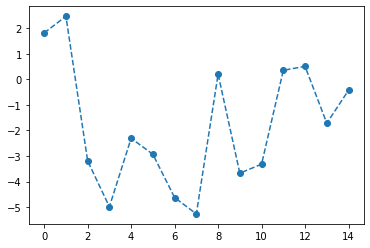

In [ ]:
# 시각화예시